In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import HTML
from pathlib import Path

# make sure plots are displayed correctly on notebooks
%pylab inline
%matplotlib inline
HTML('<style>.container { width:95% !important; }</style><style>.output_png {display: table-cell;text-align: center;vertical-align: middle;}</style>')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# FFT, Power Spectrum, Energy

Mean of f  -1.4210854715202004e-17


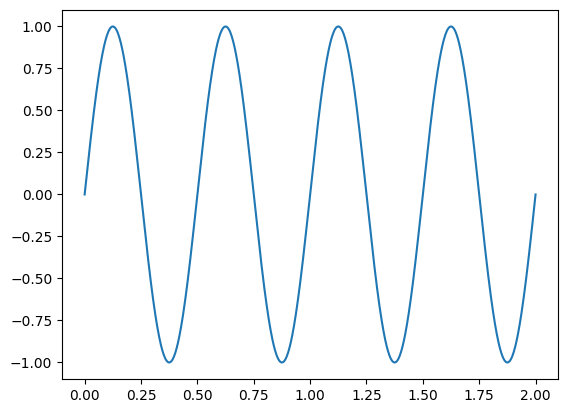

In [2]:
starttime = 0.0
endtime = 2.0
steps = 1000
t = np.linspace(starttime, endtime, num=steps)

theta = [2,4,12] # these are the frequencies
f = np.sin(2*np.pi*theta[0]*t) #+ np.sin(2*np.pi*theta[1]*t) + np.sin(2*np.pi*theta[2]*t)
dc = np.mean(f)
print('Mean of f ', dc)

plt.plot(t, f)

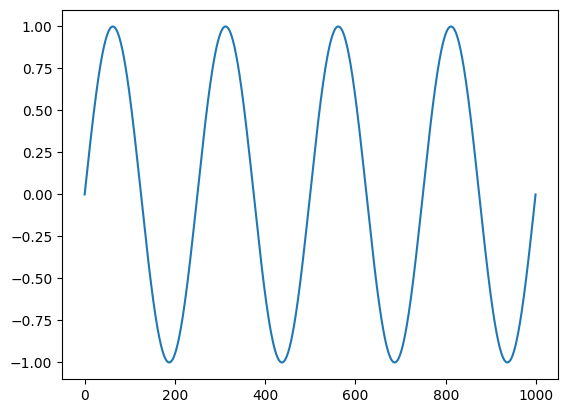

In [3]:
f = f - dc
plt.plot(np.arange(len(f)), f)

(0.0, 15.0)

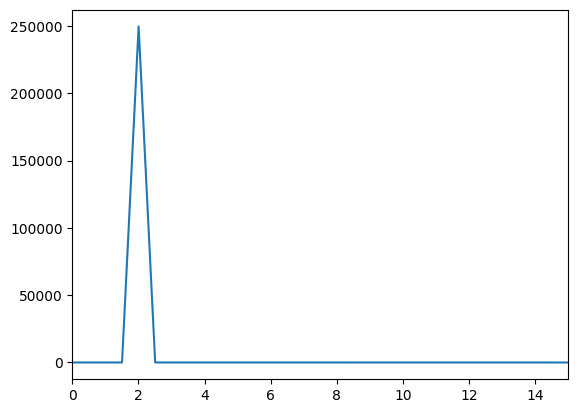

In [4]:
fhat = np.fft.fft(f)
N = len(fhat)
halvedfhat = fhat[0:int(N/2)]
powspec = abs(halvedfhat)**2

fs = steps/(endtime - starttime)

freq = np.linspace(0,int(fs/2),int(N/2))

plt.plot(freq,powspec)
plt.xlim([0,15])

In [5]:
# powspec[2*theta[i]] should give you the energy of the signal at the frequency theta[i]
for i in range(len(theta)):
    print(theta[i], powspec[2*theta[i]]) 

2 249736.73880337158
4 0.4459767961933231
12 0.02950275086152221


In [6]:
np.sum(powspec) # this is probably what Dambre calls total energy E_tot

249749.9999208767

In [7]:
de_fi = powspec[2*theta[i]]/np.sum(powspec)

In [8]:
de_fi

1.18129132616092e-07

## Test with Linear Reservoir

In [9]:
import sys  
sys.path.insert(1, './../../ESN-IP/IP/.')

In [10]:
import torch
from ESN import Reservoir

identity_activation = torch.nn.Identity()

linear_reservoir = Reservoir(1, 1, bias=True, activation=identity_activation)

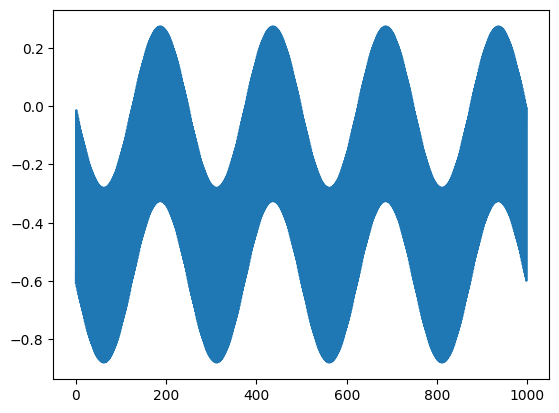

In [11]:
f_res = linear_reservoir.predict(f).flatten().numpy()
plt.plot(np.arange(len(f_res)), f_res)

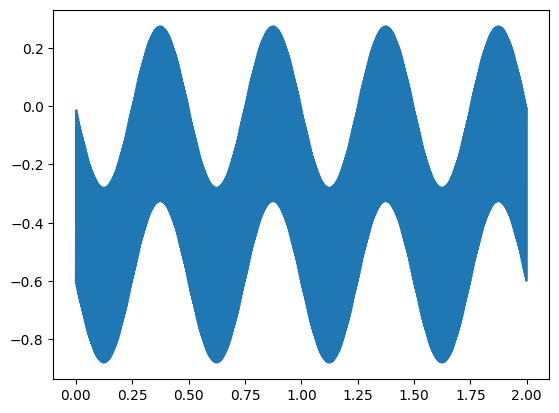

In [12]:
plt.plot(t, f_res)

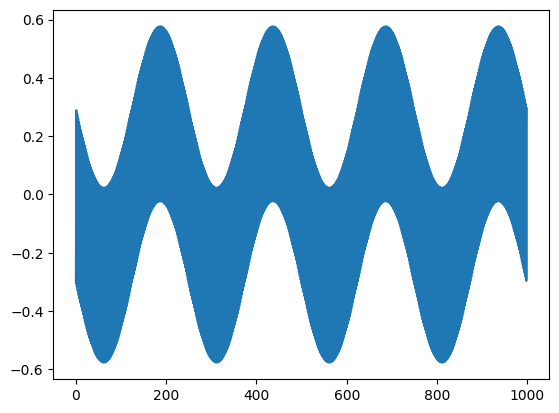

In [13]:
f = f_res - np.mean(f_res)
plt.plot(np.arange(len(f)), f)

(0.0, 15.0)

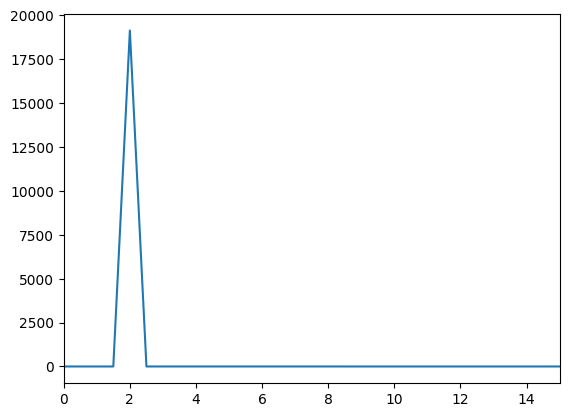

In [14]:
fhat = np.fft.fft(f)
N = len(fhat)
halvedfhat = fhat[0:int(N/2)]
powspec = abs(halvedfhat)**2

fs = steps/(endtime - starttime)

freq = np.linspace(0,int(fs/2),int(N/2))

plt.plot(freq,powspec)
plt.xlim([0,15])

In [15]:
# powspec[2*theta[i]] should give you the energy of the signal at the frequency theta[i]for i in range(len(theta)):
print(theta[0], powspec[2*theta[0]]) 

2 19125.875580607728


In [16]:
de_fi = 1 - powspec[2*theta[0]]/np.sum(powspec)

In [17]:
de_fi

5.3097014358960415e-05

## Test with Nonlinear Reservoir

In [18]:
import sys  
sys.path.insert(1, './../../ESN-IP/IP/.')

In [19]:
import torch
from ESN import Reservoir

identity_activation = torch.nn.Identity()

reservoir = Reservoir(1, 1, bias=True)

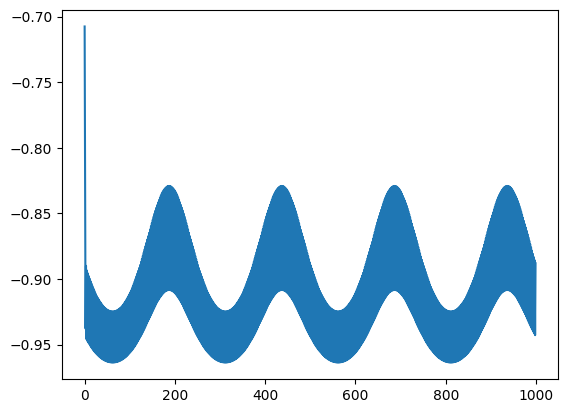

In [20]:
f_res = reservoir.predict(f).flatten().numpy()
plt.plot(np.arange(len(f_res)), f_res)

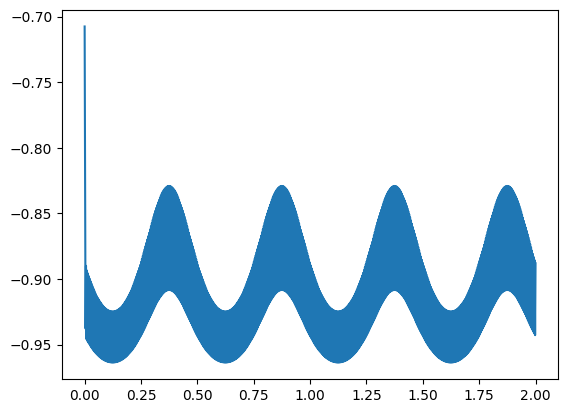

In [21]:
plt.plot(t, f_res)

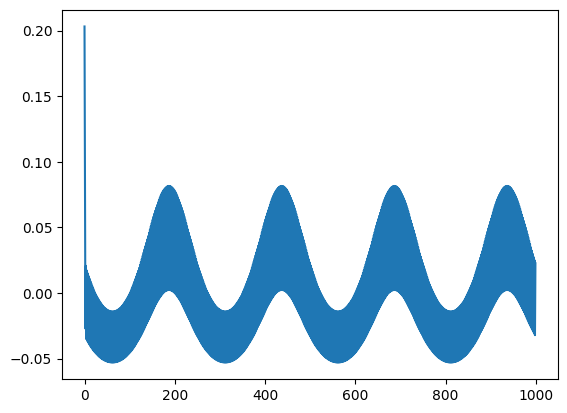

In [22]:
f = f_res - np.mean(f_res)
plt.plot(np.arange(len(f)), f)

(0.0, 15.0)

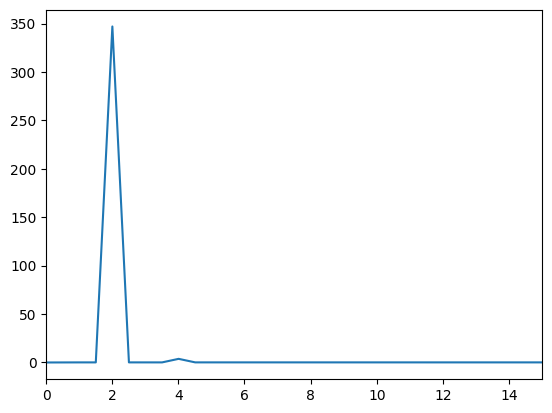

In [23]:
fhat = np.fft.fft(f)
N = len(fhat)
halvedfhat = fhat[0:int(N/2)]
powspec = abs(halvedfhat)**2

fs = steps/(endtime - starttime)

freq = np.linspace(0,int(fs/2),int(N/2))

plt.plot(freq,powspec)
plt.xlim([0,15])

In [24]:
# powspec[2*theta[i]] should give you the energy of the signal at the frequency theta[i]for i in range(len(theta)):
print(theta[0], powspec[2*theta[0]]) 

2 347.09292377546586


In [25]:
de_fi = 1 - powspec[2*theta[0]]/np.sum(powspec)

In [26]:
de_fi

0.1456390430919391

## Generalize to more than one unit

In [61]:
def deviation_from_linearity(signal, theta, verbose = True):
    starttime = 0.0
    endtime = 2.0
    steps = 1000
    fhat = np.fft.fft(signal)
    N = len(fhat)
    halvedfhat = fhat[0:int(N/2)]
    powspec = abs(halvedfhat)**2

    fs = steps/(endtime - starttime)

    freq = np.linspace(0,int(fs/2),int(N/2))

    if verbose: 
        print(f"Frequence:{theta}, Powerspect: {powspec[2*theta]}") 

        plt.plot(freq,powspec)
        plt.xlim([0,15])
    
    return 1 - powspec[2*theta]/np.sum(powspec)

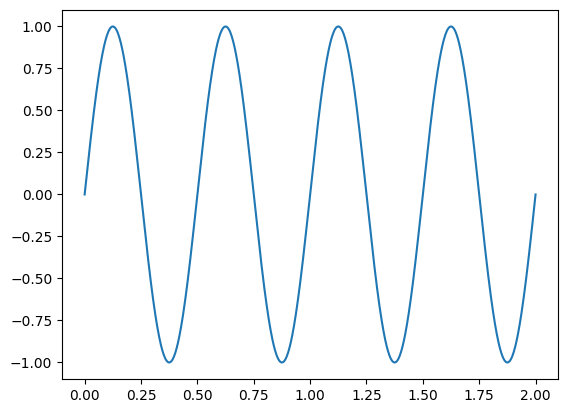

In [28]:
f = np.sin(2*np.pi*theta[0]*t) 
plt.plot(t, f)

In [39]:
reservoir = Reservoir(1, 10, bias=True)
linear_reservoir = Reservoir(1, 10, bias=True, activation=torch.nn.Identity(), ro_rescale=0.8)

In [40]:
f_res = reservoir.predict(f).numpy()
f_rlin = linear_reservoir.predict(f).numpy()

In [31]:
f_res.shape

(1000, 10)

In [41]:
# Subtract the DC component
f_res -= np.mean(f_res, axis=0)
f_rlin -= np.mean(f_rlin, axis=0)

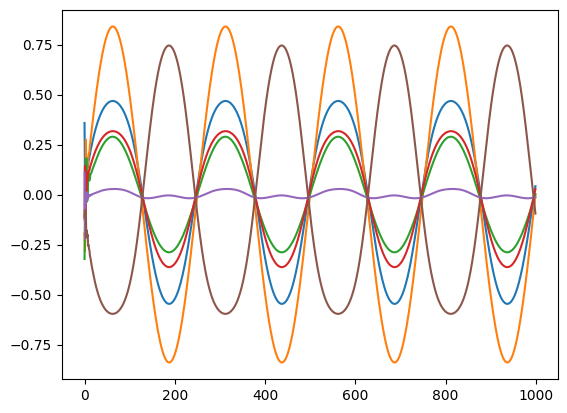

In [42]:
plt.plot(np.arange(len(f_res)), f_res[:,5])
plt.plot(np.arange(len(f_rlin)), f_rlin[:,8])
plt.plot(np.arange(len(f_rlin)), f_rlin[:,1])
plt.plot(np.arange(len(f_res)), f_res[:,3])
plt.plot(np.arange(len(f_rlin)), f_res[:,4])
plt.plot(np.arange(len(f_rlin)), f_res[:,1])

In [34]:
# Average over all neurons
f_res = np.mean(f_res, axis=1)
f_rlin = np.mean(f_rlin, axis=1)

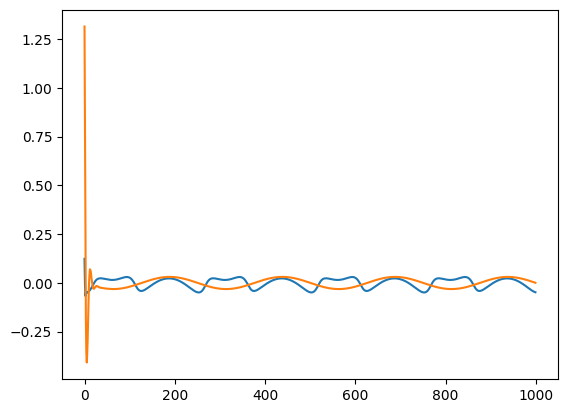

In [35]:
plt.plot(np.arange(len(f_res)), f_res)
plt.plot(np.arange(len(f_rlin)), f_rlin)

Frequence:2, Powerspect: 14.2554370218805
0.9536403756975166
Frequence:2, Powerspect: 248.6113926848964
0.8554926078759866


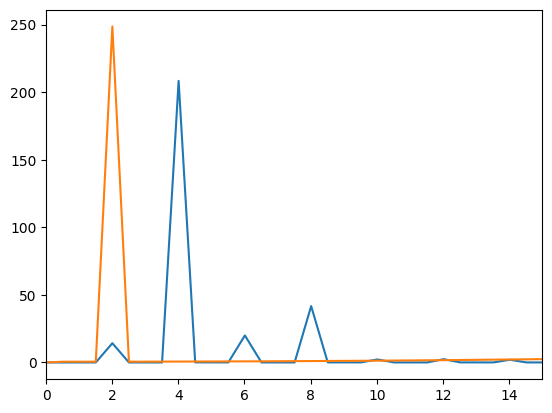

In [36]:
print(deviation_from_linearity(f_res, 2))
print(deviation_from_linearity(f_rlin, 2))

### Last step - Iterate over a range of initial carrier frequency

In [84]:
theta_range = (np.linspace(0.01, 0.5, 100)*200).astype(int)

In [85]:
theta_range

array([  2,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

Frequence:2, Powerspect: 19792.0767905728
Frequence:2, Powerspect: 19795.158592084288
Frequence:3, Powerspect: 19812.342119432684
Frequence:4, Powerspect: 19836.391050723443
Frequence:5, Powerspect: 19867.256003407758
Frequence:6, Powerspect: 19904.89140519081
Frequence:7, Powerspect: 19949.244474024603
Frequence:8, Powerspect: 20000.246806448038
Frequence:9, Powerspect: 20057.81824653723
Frequence:10, Powerspect: 20121.866726745367
Frequence:11, Powerspect: 20192.28493864078
Frequence:12, Powerspect: 20268.947492113108
Frequence:13, Powerspect: 20351.714253940478
Frequence:14, Powerspect: 20440.42525609622
Frequence:15, Powerspect: 20534.89916577403
Frequence:16, Powerspect: 20634.93442452833
Frequence:17, Powerspect: 20740.302470500264
Frequence:18, Powerspect: 20850.752620083054
Frequence:19, Powerspect: 20966.003086772882
Frequence:20, Powerspect: 21085.742991568262
Frequence:21, Powerspect: 21209.630277388285
Frequence:22, Powerspect: 21337.288340360145
Frequence:23, Powerspect: 2

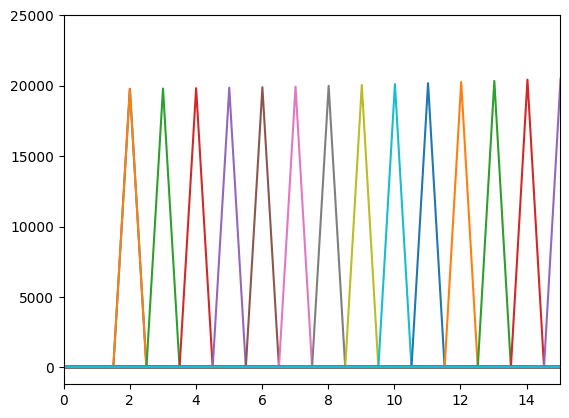

In [86]:
de_acc = 0
reservoir = Reservoir(1, 10, bias=True, activation=torch.nn.Identity())

for theta in theta_range:
    starttime = 0.0
    endtime = 2.0
    steps = 1000
    t = np.linspace(starttime, endtime, num=steps)
    f = np.sin(2*np.pi*theta*t) 

    f_res = reservoir.predict(f).numpy()
    f_res -= np.mean(f_res, axis=0)
    f_res = np.mean(f_res, axis=1)

    
    de_acc += deviation_from_linearity(f_res, theta, verbose=True)

print(de_acc/len(theta_range))

Frequence:2, Powerspect: 3505.0637842548176
Frequence:2, Powerspect: 3504.807313006437
Frequence:3, Powerspect: 3484.7430530288093
Frequence:4, Powerspect: 3457.9574768440243
Frequence:5, Powerspect: 3425.1216415706576
Frequence:6, Powerspect: 3386.7971674319283
Frequence:7, Powerspect: 3343.46155986691
Frequence:8, Powerspect: 3295.5465373816196
Frequence:9, Powerspect: 3243.465925878843
Frequence:10, Powerspect: 3187.6350081960927
Frequence:11, Powerspect: 3128.477461935247
Frequence:12, Powerspect: 3066.428303335983
Frequence:13, Powerspect: 3001.9289088036935
Frequence:14, Powerspect: 2935.4239622358496
Frequence:15, Powerspect: 2867.354556661339
Frequence:16, Powerspect: 2798.152564150776
Frequence:17, Powerspect: 2728.234743993075
Frequence:18, Powerspect: 2657.998417790361
Frequence:19, Powerspect: 2587.8155176134733
Frequence:20, Powerspect: 2518.0318112123787
Frequence:21, Powerspect: 2448.9621045348445
Frequence:22, Powerspect: 2380.8906100118184
Frequence:23, Powerspect: 231

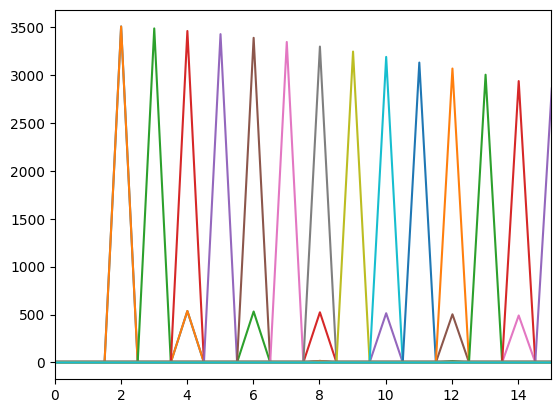

In [87]:
de_acc = 0
reservoir = Reservoir(1, 10, bias=True) #activation=torch.nn.Tanh())

for theta in theta_range:
    starttime = 0.0
    endtime = 2.0
    steps = 1000
    t = np.linspace(starttime, endtime, num=steps)
    f = np.sin(2*np.pi*theta*t) 

    f_res = reservoir.predict(f).numpy()
    f_res -= np.mean(f_res, axis=0)
    f_res = np.mean(f_res, axis=1)

    
    de_acc += deviation_from_linearity(f_res, theta, verbose=True)

print(de_acc/len(theta_range))